In [2]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tweets = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 356.9+ KB


In [6]:
##Valores nulos en columnas 'location' y 'keyword'

##nueva columna con la longitud del campo Text
tweets['text_long'] = tweets['text'].apply(lambda x: len(x))

##Nueva columna que indica si el tweet es Real o no
def Categorizar(x):
    if(x==1):
        return 'Real';
    return 'No Real';

tweets['type'] = tweets['target'].apply(lambda x: Categorizar(x))

In [7]:
#Elimino los nulos de ubicación 
tweets_filter = tweets.dropna(subset=['keyword','location']).loc[:,['type','text_long']]

In [8]:
tweets_filter.groupby('type').agg({'text_long':['min','mean','max','count']})

text_long                       
              min        mean  max count
type                                    
No Real         8   97.607836  152  2884
Real           17  108.508197  148  2196

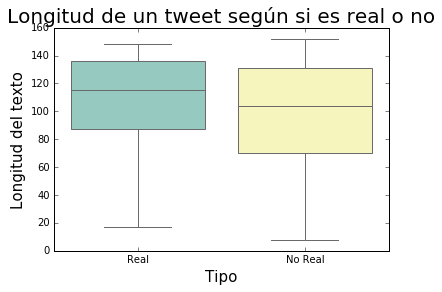

In [9]:
g = sns.boxplot(x="type", y="text_long", data=tweets_filter, palette="Set3")
g.set_title("Longitud de un tweet según si es real o no",fontsize=20)
g.set_xlabel("Tipo", fontsize=15)
g.set_ylabel("Longitud del texto",fontsize=15)